# Import library

In [145]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Data processing

Read data from file

In [146]:
data = pd.read_csv('C:\HoangTu\Programing\\University\ML\Perceptron\HeartStudy\\framingham.csv')

Display data

In [147]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


describe data

In [148]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Drop NaN data

In [149]:
data.dropna(inplace=True)

Display new data

In [150]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


Split data to X and Y

In [151]:
X = data.drop(columns='TenYearCHD')
Y = data['TenYearCHD']

Display X

In [152]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


Display Y

In [153]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

Add 1 to first then transpose

In [154]:
X = np.concatenate((np.ones((1, X.shape[0])), X.T), axis = 0).T

Split to train and test

In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# I. Reducing the data dimensionality to 02 dimensions and finding a way to visually represent the data after dimensionality reduction.

In [156]:
model = PCA(n_components=2)
X_pca = StandardScaler().fit_transform(X)
result = model.fit_transform(X_pca)
print(result.shape)

pc1 = -result[:,0]
pc2 = -result[:,1]

(3656, 2)


Visualize reduced data

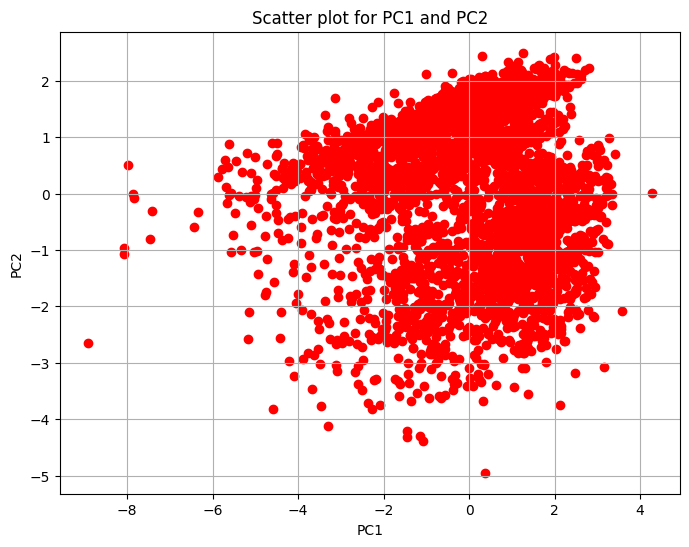

In [157]:
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c='r')  # Color red with transparency 0.5
plt.title('Scatter plot for PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# II. "Please preprocess the data as requested in the logistic regression part, using appropriate data transformations."

In [158]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.3, random_state=0)

## Perceptron method

In [159]:
perceptron = Perceptron(eta0=0.1, random_state=0)
perceptron.fit(x_train_pca, y_train_pca)


Perceptron(eta0=0.1)

In [160]:
perceptron_predict_pca = perceptron.predict(x_test_pca)

In [161]:
accuracy_perceptron = accuracy_score(y_test_pca, perceptron_predict_pca)
print("Accuracy:", accuracy_perceptron)

Accuracy: 0.8277119416590701


In [162]:
recall_perceptron = recall_score(y_test_pca, perceptron_predict_pca, average='macro')
print("Recall:", recall_perceptron)

Recall: 0.537619873495205


In [163]:
precision_perceptron = precision_score(y_test_pca, perceptron_predict_pca, average='macro')
print("Precision:", precision_perceptron)

Precision: 0.5948248151719704


## Logistic method

In [164]:
logistic = LogisticRegression(max_iter=100000, random_state = 0, tol = 1e-5)
logistic.fit(x_train_pca, y_train_pca)

LogisticRegression(max_iter=100000, random_state=0, tol=1e-05)

In [165]:
logistic_predict_pca = logistic.predict(x_test_pca)

In [166]:
accuracy_logistic = accuracy_score(y_test_pca, logistic_predict_pca)
print("Accuracy:", accuracy_logistic)

Accuracy: 0.8523245214220602


In [167]:
recall_logistic = recall_score(y_test_pca, logistic_predict_pca, average='macro')
print("Recall:", recall_logistic)

Recall: 0.5328089930626403


In [168]:
precision_logistic = precision_score(y_test_pca, logistic_predict_pca, average='macro')
print("Precision:", precision_logistic)

Precision: 0.780255991285403


## Gaussian method

In [169]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [170]:
gaussian_predict = gaussian.predict(x_test)

In [171]:
accuracy_gaussian = accuracy_score(y_test, gaussian_predict)
print("Accuracy:", accuracy_gaussian)

Accuracy: 0.8286235186873291


In [172]:
recall_gaussian = recall_score(y_test, gaussian_predict, average='macro')
print("Recall:", recall_gaussian)

Recall: 0.5841346153846154


In [173]:
precision_gaussian = precision_score(y_test, gaussian_predict, average='macro')
print("Precision:", precision_gaussian)

Precision: 0.6360309278350516


## Explain each coefficient of each model
* Accuracy: 
    * Định nghĩa: đo lường tỷ lệ các dự đoán đúng trên tổng số các dự đoán
    * Ý nghĩa: Accuracy đo lường khả năng tổng thể của mô hình phân loại đúng các điểm dữ liệu. Một giá trị accuracy cao cho thấy mô hình đang làm việc tốt trong việc phân loại các điểm dữ liệu.
* Precision:
    * Định nghĩa: đo lường tỷ lệ các dự đoán Positive (dự đoán là Positive) đúng so với tổng số các dự đoán Positive.
    * Ý nghĩa: Precision đánh giá khả năng của mô hình phân loại để không gắn nhãn sai các điểm dữ liệu là Positive. Một giá trị Precision cao cho thấy mô hình có ít dự đoán False Positive.
* Recall  
    * Định nghĩa: Đo lường tỷ lệ các dự đoán Positive đúng so với tổng số điểm dữ liệu thực sự là Positive
    * Ý nghĩa: Recall đánh giá khả năng của mô hình phân loại để tìm ra tất cả các điểm dữ liệu Positive có trong tập dữ liệu. Một giá trị Recall cao cho thấy mô hình có ít dự đoán False Negative.

# III. "Please redo question 2) with the dimension-reduced data obtained in question 1). Explain the results obtained from the models as well as comments on the accuracy of each model."

## Perceptron method

In [174]:
perceptron_pca = Perceptron(eta0=0.1, random_state=0)
perceptron_pca.fit(x_train_pca, y_train_pca)

Perceptron(eta0=0.1)

In [175]:
perceptron_predict_pca = perceptron_pca.predict(x_test_pca)

In [176]:
accuracy_perceptron_pca = accuracy_score(y_test_pca, perceptron_predict_pca)
print("Accuracy:", accuracy_perceptron_pca)

Accuracy: 0.8277119416590701


In [177]:
recall_perceptron_pca = recall_score(y_test, perceptron_predict_pca, average='macro')
print("Recall:", recall_perceptron_pca)

Recall: 0.537619873495205


In [178]:
precision_perceptron_pca = precision_score(y_test, perceptron_predict_pca, average='macro')
print("Precision:", precision_perceptron_pca)

Precision: 0.5948248151719704


## Logistic method

In [179]:
logistic_pca = LogisticRegression(max_iter=100000, random_state=0, tol=1e-5)
logistic_pca.fit(x_train_pca, y_train_pca)

LogisticRegression(max_iter=100000, random_state=0, tol=1e-05)

In [180]:
logistic_predict_pca = logistic_pca.predict(x_test_pca)

In [181]:
logistic_accuracy_pca = accuracy_score(y_test_pca, logistic_predict_pca)
print("Accuracy:", logistic_accuracy_pca)

Accuracy: 0.8523245214220602


In [182]:
logistic_recall_pca = recall_score(y_test_pca, logistic_predict_pca, average='macro')
print("Recall:", logistic_recall_pca)

Recall: 0.5328089930626403


In [183]:
logistic_precision_pca = precision_score(y_test_pca, logistic_predict_pca, average='macro')
print("Precision:", logistic_precision_pca)

Precision: 0.780255991285403


## Gaussian method

In [184]:
gaussian_pca = GaussianNB()
gaussian_pca.fit(x_train_pca, y_train_pca)

GaussianNB()

In [185]:
gaussian_predict_pca = gaussian_pca.predict(x_test_pca)

In [186]:
gaussian_accuracy_pca = accuracy_score(y_test_pca, gaussian_predict_pca)
print("Accuracy:", gaussian_accuracy_pca)

Accuracy: 0.8286235186873291


In [187]:
gaussian_recall_pca = recall_score(y_test_pca, gaussian_predict_pca, average='macro')
print("Recall:", gaussian_recall_pca)

Recall: 0.5841346153846154


In [188]:
gaussian_precision_pca = precision_score(y_test_pca, gaussian_predict_pca, average='macro')
print("Precision:", gaussian_precision_pca)

Precision: 0.6360309278350516


## Print out all coefficient

### Perceptron

In [189]:
print("Perceptron")
print("Accuracy:", accuracy_perceptron)
print("Recall:", recall_perceptron)
print("Precision:", precision_perceptron)

Perceptron
Accuracy: 0.8277119416590701
Recall: 0.537619873495205
Precision: 0.5948248151719704


In [190]:
print("Perceptron PCA")
print("Accuracy:", accuracy_perceptron_pca)
print("Recall:", recall_perceptron_pca)
print("Precision:", precision_perceptron_pca)

Perceptron PCA
Accuracy: 0.8277119416590701
Recall: 0.537619873495205
Precision: 0.5948248151719704


### Logistic

In [191]:
print("Logistic")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("Precision:", precision_logistic)

Logistic
Accuracy: 0.8523245214220602
Recall: 0.5328089930626403
Precision: 0.780255991285403


In [192]:
print("Logistic PCA")
print("Accuracy:", logistic_accuracy_pca)
print("Recall:", logistic_recall_pca)
print("Precision:", logistic_precision_pca)

Logistic PCA
Accuracy: 0.8523245214220602
Recall: 0.5328089930626403
Precision: 0.780255991285403


### Gaussian

In [193]:
print("Gaussian NB")
print("Accuracy:", accuracy_gaussian)
print("Recall:", recall_gaussian)
print("Precision:", precision_gaussian)

Gaussian NB
Accuracy: 0.8286235186873291
Recall: 0.5841346153846154
Precision: 0.6360309278350516


In [194]:
print("Gaussian NB PCA")
print("Accuracy:", gaussian_accuracy_pca)
print("Recall:", gaussian_recall_pca)
print("Precision:", gaussian_precision_pca)

Gaussian NB PCA
Accuracy: 0.8286235186873291
Recall: 0.5841346153846154
Precision: 0.6360309278350516
